# Sandbox - Tutorial

## Building a fiber bundle

A [fiber bundle](https://github.com/3d-pli/fastpli/wiki/FiberModel) consit out of multiple individual nerve fibers.
A fiber bundle is a list of fibers, where fibers are represented as `(n,4)-np.array`.

This makes desining individually fiber of any shape possible.
However since nerve fibers are often in nerve fiber bundles, this toolbox allows to fill fiber_bundles from a pattern of fibers.

Additionally this toolbox also allows to build parallell cubic shapes as well as different kinds of cylindric shapes to allow a faster building experience.

## General imports

First, we prepair all necesarry modules and defining a function to euqalice all three axis of an 3d plot.

You can change the `magic ipython` line from `inline` to `qt`.
This generate seperate windows allowing us also to rotate the resulting plots and therfore to investigate the 3d models from different views.
Make sure you have `PyQt5` installed if you use it.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
# %matplotlib qt

import fastpli.model.sandbox as sandbox

def set_3d_axes_equal(ax):
    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()

    x_range = abs(x_limits[1] - x_limits[0])
    x_middle = np.mean(x_limits)
    y_range = abs(y_limits[1] - y_limits[0])
    y_middle = np.mean(y_limits)
    z_range = abs(z_limits[1] - z_limits[0])
    z_middle = np.mean(z_limits)

    plot_radius = 0.5 * max([x_range, y_range, z_range])

    ax.set_xlim3d([x_middle - plot_radius, x_middle + plot_radius])
    ax.set_ylim3d([y_middle - plot_radius, y_middle + plot_radius])
    ax.set_zlim3d([z_middle - plot_radius, z_middle + plot_radius])

## Designing a fiber bundle

The idea is to build design first a macroscopic struces, i. e. nerve fiber bundles, which can then at a later step be filled with individual nerve fibers.



We start by defining a fiber bundle as a trajectory of points (similar to fibers).
As an example we start with use a helical form.

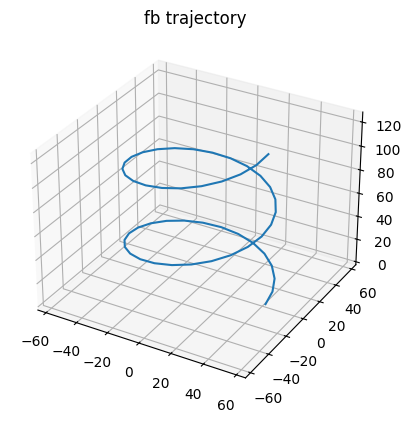

In [2]:
t = np.linspace(0, 4 * np.pi, 50, True)
traj = np.array((42 * np.cos(t), 42 * np.sin(t), 10 * t)).T

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot(
    traj[:, 0],
    traj[:, 1],
    traj[:, 2],
)
plt.title("fb trajectory")
set_3d_axes_equal(ax)
plt.show()

### seed points

seed points are used to initialize the populating process of individual fibers inside the fiber bundle.

Seed points are a list of 3d points.
This toolbox provides two methods to build seed points pattern.

The first one is a 2d triangular grid.
It is defined by a `width`, `height` and an inside `spacing` between the seed point.
Additionally one can actiavte the `center` option so that the seed points are centered around a seed point at `(0,0,0)`.

The second method provides a circular shape instead of a rectangular.
However it can also be achievd by using an additional function `crop_circle` which returns only seed points along the first two dimensions with the defined `radius` around the center.

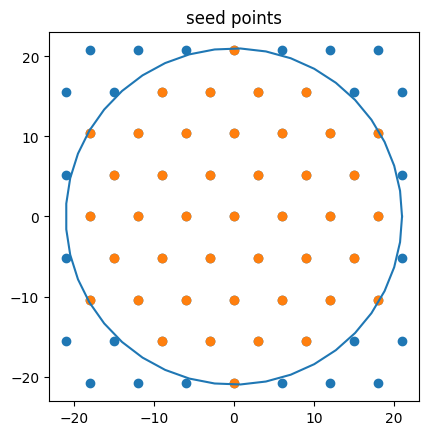

In [3]:
seeds = sandbox.seeds.triangular_grid(width=42,
                                      height=42,
                                      spacing=6,
                                      center=True)
radius = 21
circ_seeds = sandbox.seeds.crop_circle(radius=radius, seeds=seeds)
fig, ax = plt.subplots(1, 1)
plt.title("seed points")
plt.scatter(seeds[:, 0], seeds[:, 1])
plt.scatter(circ_seeds[:, 0], circ_seeds[:, 1])
ax.set_aspect('equal', 'box')

# plot circle margin
t = np.linspace(0, 2 * np.pi, 42)
x = radius * np.cos(t)
y = radius * np.sin(t)
plt.plot(x, y)
plt.show()

### Generating a fiber bundle from seed points

The next step is to build a fiber bundle from the desined trajectory and seed points.

However one additional step is necesarry.
Since nerve fibers are not a line, but a 3d object, they need also a volume for the later `solving` and `simulation` steps of this toolbox.
This toolbox describes nerve fibers as tubes, which are defined by a list of points and radii, i. e. (n,4)-np.array).
The radii `[:,3]` can change along the fiber trajectories `[:,0:3]` allowiing for a change of thickness.

Now we have everything we need to build a fiber bundle from the desined trajectory and seed points.
The function `bundle` provides this funcionallity.
Additionally to the `traj` and `seeds` parameter the `radii` can be a single number if all fibers should have the same radii, or a list of numbers, if each fiber shell have a different radii.
An additional `scale` parameter allows to scale the seed points along the trajectory e. g. allowing for a fanning. 


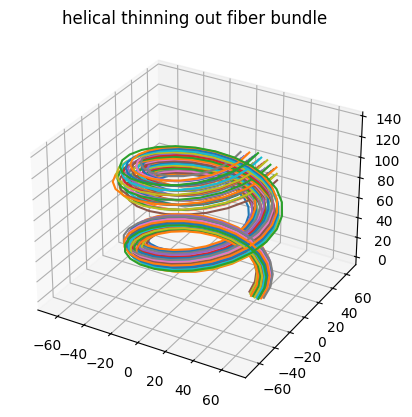

In [4]:
# populating fiber bundle
fiber_bundle = sandbox.build.bundle(
    traj=traj,
    seeds=circ_seeds,
    radii=np.random.uniform(0.5, 0.8, circ_seeds.shape[0]),
    scale=0.25 + 0.5 * np.linspace(0, 1, traj.shape[0]))

# plotting
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
for fiber in fiber_bundle:
    ax.plot(fiber[:, 0], fiber[:, 1], fiber[:, 2])
plt.title("helical thinning out fiber bundle")
set_3d_axes_equal(ax)
plt.show()

## Additional macroscopic structures

In the development and using of this toolbox, it was found that it is usefull to have other patterns than filled fiber bundles to build macroscopic structures.
Depending on a brain sections, where the nerve fiber orientation is measured with the 3D-PLI technique, nerve fibers can be visibale as type of patterns.

### Cylindrical shapes

Radial shaped patterns can be quickly build with the following `cylinder` method.
A hollow cylinder is defined by a inner and outer radii `r_in` and `r_out`, along two points `p` and `q`.
Additionally the cylinder can be also only partial along its radius by defining two angles `alpha` and `beta`.
Again as for the `bundle` method, one needs seed points to defining a pattern.
Filling this cylindrig shape can be performed by three differet `mode`s: 
- radial
- circular
- parallel

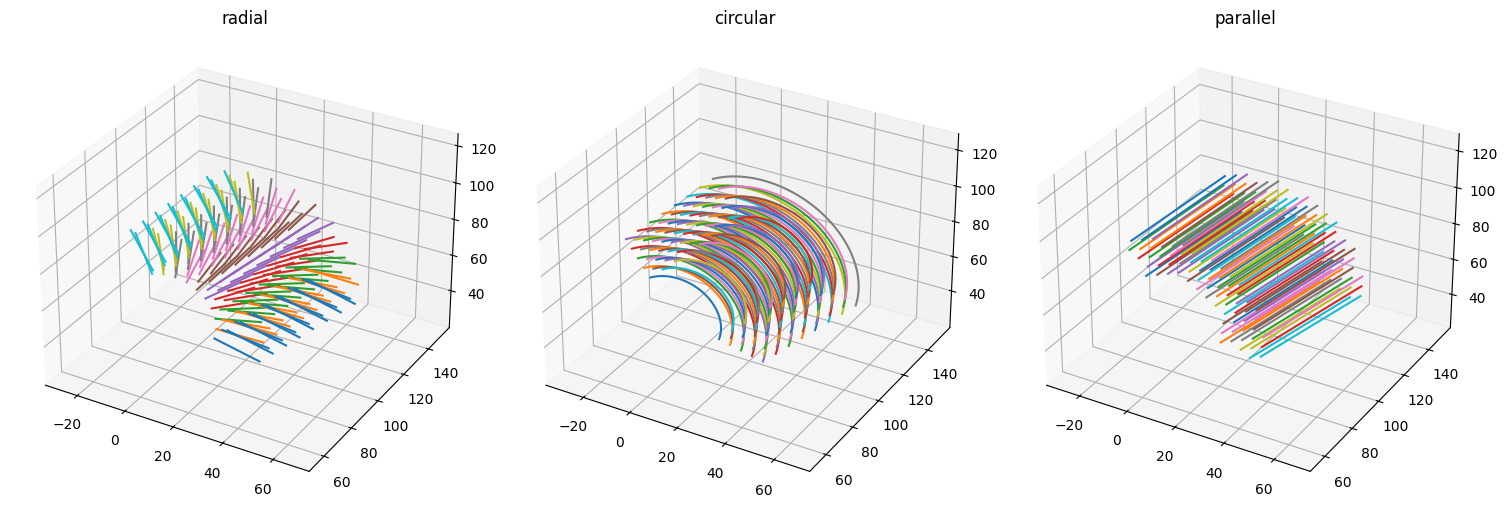

In [5]:
# plotting
seeds = sandbox.seeds.triangular_grid(width=200,
                                      height=200,
                                      spacing=5,
                                      center=True)

fig, axs = plt.subplots(1, 3, figsize=(15,5), subplot_kw={'projection':'3d'}, constrained_layout=True)
for i, mode in enumerate(['radial', 'circular', 'parallel']):
    # ax = fig.add_subplot(1, 1, 1, projection='3d')
    fiber_bundle = sandbox.build.cylinder(p=(0, 80, 50),
                                          q=(40, 80, 100),
                                          r_in=20,
                                          r_out=40,
                                          seeds=seeds,
                                          radii=1,
                                          alpha=np.deg2rad(20),
                                          beta=np.deg2rad(160),
                                          mode=mode)
    for fiber in fiber_bundle:
        axs[i].plot(fiber[:, 0], fiber[:, 1], fiber[:, 2])
    set_3d_axes_equal(axs[i])
    axs[i].set_title(f'{mode}')
plt.show()

### Cubic shapes

The next method allows placing fibers inside a cube with a use definde direction.
The cube is definded by two 3d points `p` and `q`.
The direction of the fibers inside the cube is defined by spherical angels `phi` and `theta`.
Seed points again describe the pattern of fibers inside the cube. 
The seed points (rotated its xy-plane according to `phi` and `theta`) are places at point `q` and `q`.
From the corresponding seed points are the starting and end point for each fiber.

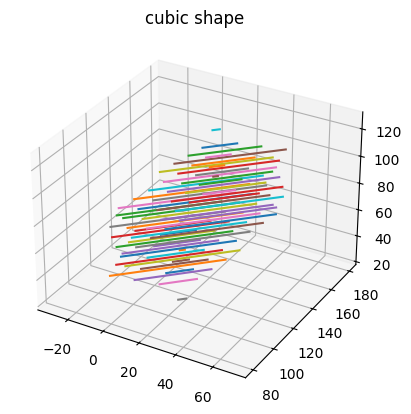

In [6]:
# define cub corner points
p = np.array([0, 80, 50])
q = np.array([40, 180, 100])

# create seed points which will fill the cube
d = np.max(np.abs(p - q)) * np.sqrt(3)
seeds = sandbox.seeds.triangular_grid(width=d,
                                      height=d,
                                      spacing=10,
                                      center=True)

# fill a cube with (theta, phi) directed fibers
fiber_bundle = sandbox.build.cuboid(p=p,
                                    q=q,
                                    phi=np.deg2rad(45),
                                    theta=np.deg2rad(90),
                                    seeds=seeds,
                                    radii=1)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
for fiber in fiber_bundle:
    ax.plot(fiber[:, 0], fiber[:, 1], fiber[:, 2])
plt.title('cubic shape')
set_3d_axes_equal(ax)
plt.show()                              

## next

from here further anatomical more interesting examples are presented in the solver tutorial and `examples/crossing.py` example.